# Librerias

Se cargan las librerías que nos pemitiran hacer los análisis

In [1]:
import pandas as pd
import numpy as np
from datetime import *
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
import prince
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Carga y gestión de archivo

En este módulo se realiza la carga y preprocesamiento de un archivo CSV para su análisis. El proceso incluye la estandarización de nombres de columnas, manejo de valores nulos, especificación de tipos de datos, renombrado de columnas, y la creación de nuevas variables sintéticas. 

In [2]:
ruta = "C:/Users/aperezl/Pytho/Kaizen/info_cartera.csv"
# Cargar archivo
df = pd.read_csv(ruta, sep= ';', decimal=',')
# Modificando nombre de columnas
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
# Valores nulos
df['zona'] = np.where(df['zona']=='#N/D','Sin identificar',df['zona'])
df.replace('#N/D', np.nan, inplace=True)
# Especificar tipo de dato
df = df.drop('contar', axis=1)
df = df.astype({'documento':str, 'razón_social':str, 'zona':str, 'factura':str, 'plazo':int, 'venc.':int})
df[['corriente', 'de_1_a_30', 'de_31_a_60','de_61_a_90', 
    'de_91_o_mas', 'cart_10_ene']] = df[['corriente', 'de_1_a_30', 'de_31_a_60','de_61_a_90', 'de_91_o_mas', 
                                         'cart_10_ene']].astype(float)
df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True, errors='coerce')
df['f.vcto.'] = pd.to_datetime(df['fecha'], dayfirst=True, errors='coerce')
# Nuevas variables
df = df.rename(columns={'corriente': 'saldo_pendiente'})
df['saldo_pendiente_venc'] = df[['de_1_a_30', 'de_31_a_60','de_61_a_90', 'de_91_o_mas']].sum(axis=1)
df['interes'] = np.where(df['venc.']>0,'Cartera_venc','Cartera_sana')
print(df.shape)
print('='*120)
print(df.dtypes)
print('='*120)
print(df.isna().sum()/df.shape[0])
df.head()

(239295, 17)
documento                       object
razón_social                    object
zona                            object
factura                         object
fecha                   datetime64[ns]
f.vcto.                 datetime64[ns]
plazo                            int32
venc.                            int32
saldo_pendiente                float64
de_1_a_30                      float64
de_31_a_60                     float64
de_61_a_90                     float64
de_91_o_mas                    float64
cart_10_ene                    float64
semana                          object
saldo_pendiente_venc           float64
interes                         object
dtype: object
documento               0.0
razón_social            0.0
zona                    0.0
factura                 0.0
fecha                   0.0
f.vcto.                 0.0
plazo                   0.0
venc.                   0.0
saldo_pendiente         0.0
de_1_a_30               0.0
de_31_a_60              0.0
de

,documento,razón_social,zona,factura,fecha,f.vcto.,plazo,venc.,saldo_pendiente,de_1_a_30,de_31_a_60,de_61_a_90,de_91_o_mas,cart_10_ene,semana,saldo_pendiente_venc,interes
0,245453,FORERO ANGEL JOSE HUGO,TOLI - TOL,HRC-F7Y-00143256-00,2022-03-23,2022-03-23,31,0,1497600.0,0.0,0.0,0.0,0.0,1497600.0,1 semana abril 2022,0.0,Cartera_sana
1,245453,FORERO ANGEL JOSE HUGO,TOLI - TOL,HRC-F7Y-00147631-00,2022-04-09,2022-04-09,30,0,3385629.0,0.0,0.0,0.0,0.0,3385629.0,1 semana abril 2022,0.0,Cartera_sana
2,2774677,HERRERA CASTAÑO VICENTE ANTONIO,MDNT - MEDELLIN-NORTE,HRC-F7Y-00145675-00,2022-03-31,2022-03-31,31,0,162535.0,0.0,0.0,0.0,0.0,162535.0,1 semana abril 2022,0.0,Cartera_sana
3,2950748,LEON GARCIA JUAN PABLO,Sin identificar,HRC-P9Y-00005789-00,2022-03-04,2022-03-04,15,23,0.0,8520.0,0.0,0.0,0.0,8520.0,1 semana abril 2022,8520.0,Cartera_venc
4,2950748,LEON GARCIA JUAN PABLO,Sin identificar,HRC-F7Y-00142642-00,2022-03-19,2022-03-19,31,0,1497600.0,0.0,0.0,0.0,0.0,1497600.0,1 semana abril 2022,0.0,Cartera_sana


In [4]:
#Cargar maestra de clientes

ruta = "C:/Users/aperezl/Pytho/Kaizen/total_maestra_clientes.csv"
# Cargar archivo
df2 = pd.read_csv(ruta, sep= ';', decimal=',', encoding='latin-1')
# Modificando nombre de columnas
df2.columns = df2.columns.str.lower()
df2.columns = df2.columns.str.replace(' ', '_')
print(df2.columns)
# Especificar tipo de dato
df2 = df2.astype({'razón_social':str, 'código':int, 'condicion_de_pago':str, 'marca_para_descuentos_honda':str, 'ciudad':str, 'depto/estado':str,'asesor_de_ventas':str,'clase_de_cliente':str,'zona_repuestos':str})
df2['fecha_ingreso'] = pd.to_datetime(df2['fecha_ingreso'], dayfirst=True, errors='coerce')

Index(['razón_social', 'fecha_ingreso', 'código', 'condicion_de_pago',
       'marca_para_descuentos_honda', 'ciudad', 'depto/estado',
       'asesor_de_ventas', 'clase_de_cliente', 'zona_repuestos'],
      dtype='object')


###  Exploración de datos

1. Se revisan cuál es la proporción de facturas vencidas, se encuentran que 169689 facturas no presentan vencimiento, por otra parte, 69606 facturas sí presentan vencimiento.

2. Se revisan la cantidad de facturas por mes y la distribución de días vencidos por mes, encontrando que la

In [5]:
# Facturas sanos y morosos
print('Sanos: ',df[df['venc.']==0].shape[0])
print('Morosos: ',df[df['venc.']>0].shape[0])

Sanos:  169689
Morosos:  69606


In [6]:
df['stranomes'] = df['fecha'].apply(lambda x: x.strftime("%Y-%m"))
df['stranomes'].value_counts()

stranomes
2022-08    18574
2022-10    17049
2022-11    16646
2022-09    15856
2022-03    15789
2023-01    15747
2023-02    14472
2022-12    14314
2022-04    13937
2022-07    13915
2022-06    13908
2022-05    13615
2022-02    13577
2023-03    13289
2022-01    12009
2021-12     6676
2023-04     5725
2021-11     1927
2021-10      895
2021-09      482
2021-07      392
2021-06      249
2021-08      187
2021-04       24
2021-02       15
2021-05       11
2020-11        7
2020-12        4
2021-03        4
Name: count, dtype: int64

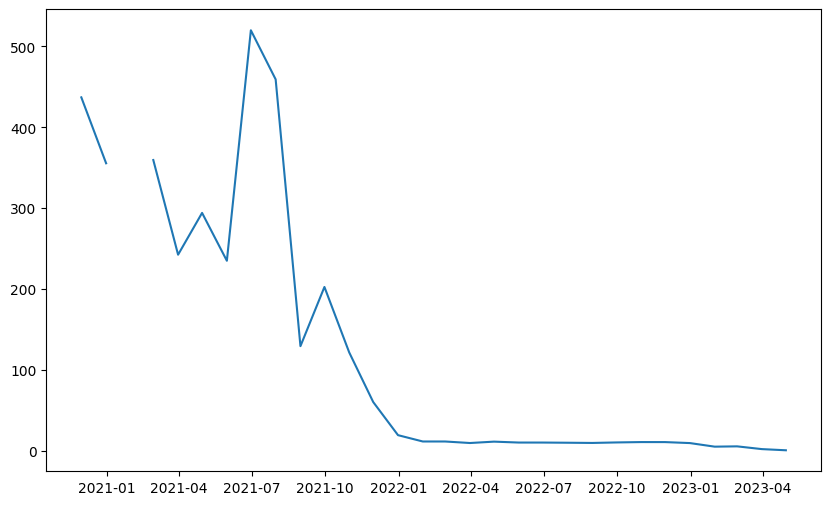

In [7]:
df_mensual = df[['fecha','venc.']]
df_mensual = df_mensual.set_index('fecha')
df_mensual = df_mensual.resample('M').mean()
plt.figure(figsize=(10, 6))  # Tamaño de 10 pulgadas de ancho y 6 pulgadas de alto
plt.plot(df_mensual.index, df_mensual['venc.'], label='Mensual')

count    239295.000000
mean         12.052872
std          43.191407
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max         639.000000
Name: venc., dtype: float64


<Axes: xlabel='venc.'>

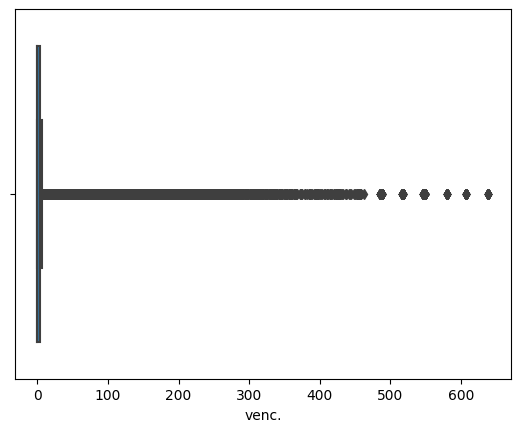

In [8]:
print(df['venc.'].describe())
sns.boxplot(x=df["venc."])

<Axes: xlabel='venc.', ylabel='Density'>

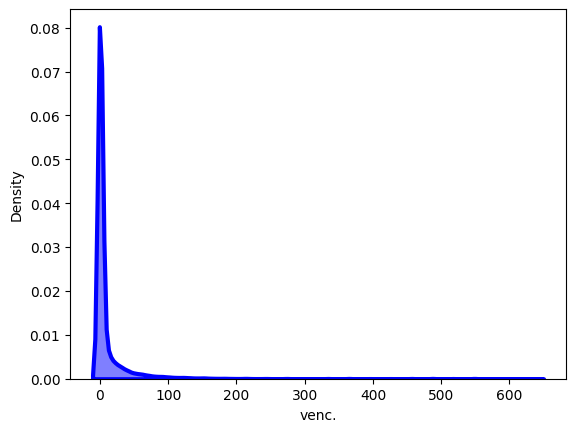

In [9]:
sns.kdeplot(data=df, x='venc.', shade=True, color="blue", alpha=.5, linewidth=3)

In [11]:
# Graficos de correlacion
# Filtrar columnas numéricas
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()

,plazo,venc.,saldo_pendiente,de_1_a_30,de_31_a_60,de_61_a_90,de_91_o_mas,cart_10_ene,saldo_pendiente_venc
plazo,1.000000,-0.189995,0.043379,-0.004103,0.016153,0.011867,0.011281,0.042728,0.004433
venc.,-0.189995,1.000000,-0.084198,-0.008053,0.062664,0.075971,0.154356,-0.060098,0.052163
saldo_pendiente,0.043379,-0.084198,1.000000,-0.042540,-0.026646,-0.016185,-0.015144,0.926922,-0.052316
de_1_a_30,-0.004103,-0.008053,-0.042540,1.000000,-0.012451,-0.007563,-0.007077,0.310285,0.932910
de_31_a_60,0.016153,0.062664,-0.026646,-0.012451,1.000000,-0.004737,-0.004433,0.062018,0.232168
de_61_a_90,0.011867,0.075971,-0.016185,-0.007563,-0.004737,1.000000,-0.002692,0.045528,0.161934
de_91_o_mas,0.011281,0.154356,-0.015144,-0.007077,-0.004433,-0.002692,1.000000,0.058935,0.194991
cart_10_ene,0.042728,-0.060098,0.926922,0.310285,0.062018,0.045528,0.058935,1.000000,0.326241
saldo_pendiente_venc,0.004433,0.052163,-0.052316,0.932910,0.232168,0.161934,0.194991,0.326241,1.000000


<Axes: >

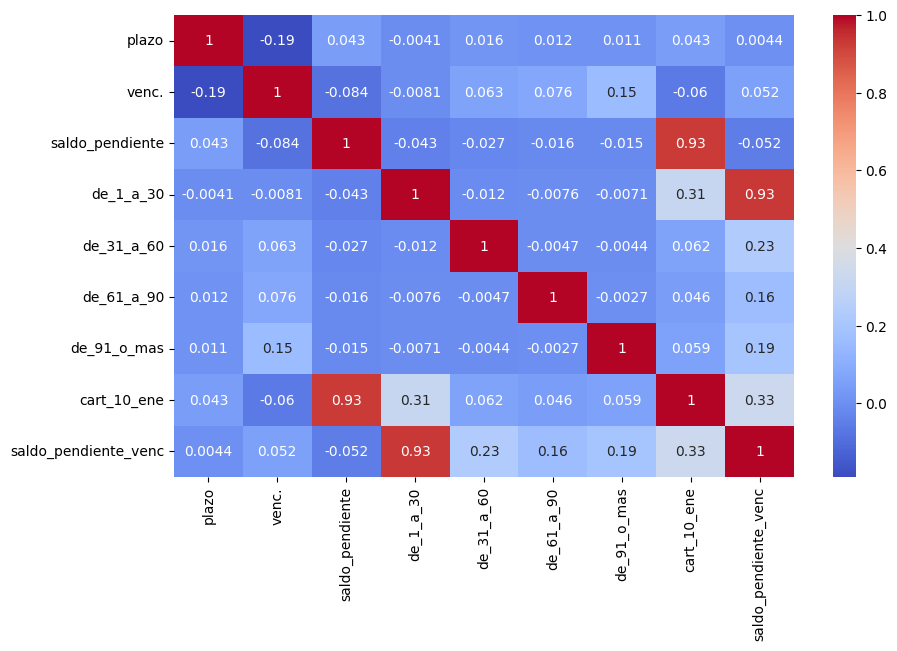

In [13]:
plt.figure(figsize=(10, 6))  # Tamaño de 10 pulgadas de ancho y 6 pulgadas de alto
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')

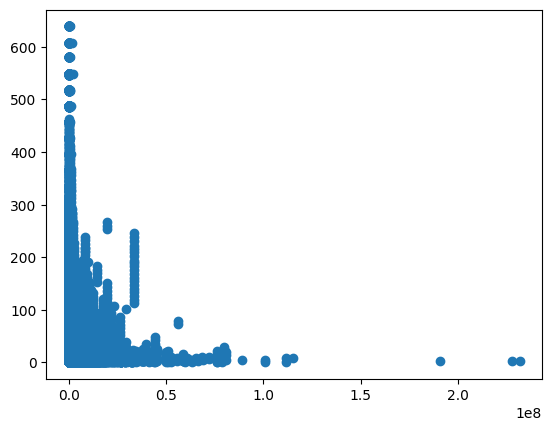

In [14]:
plt.scatter(df['saldo_pendiente_venc'], df['venc.'])

In [15]:
df.columns

Index(['documento', 'razón_social', 'zona', 'factura', 'fecha', 'f.vcto.',
       'plazo', 'venc.', 'saldo_pendiente', 'de_1_a_30', 'de_31_a_60',
       'de_61_a_90', 'de_91_o_mas', 'cart_10_ene', 'semana',
       'saldo_pendiente_venc', 'interes', 'stranomes'],
      dtype='object')

In [16]:
# Estandariza los datos utilizando la función StandardScaler de Scikit-learn
X = df[['plazo', 'venc.', 'saldo_pendiente', 'de_1_a_30', 'de_31_a_60','de_61_a_90', 'de_91_o_mas', 'cart_10_ene',
        'saldo_pendiente_venc']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns, dtype=float)
# Realizar el ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

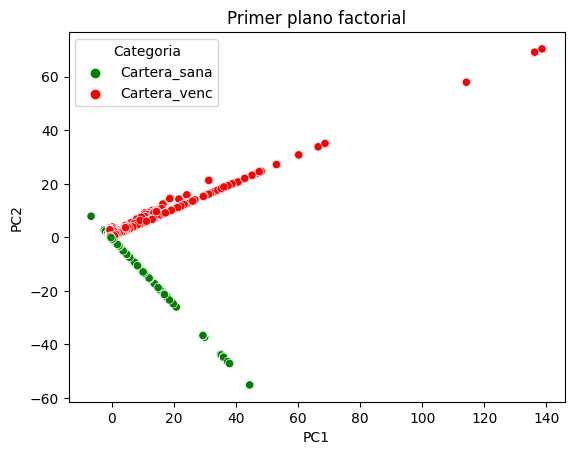

------------------------------------------------------------------------------------------------------------------------
Porcentaje de varianza explicado: 25.253 %


In [17]:
# Graficar los datos en el primer plano factorial
result_pca = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'Categoria': df.interes})
sns.scatterplot(data=result_pca, x='PC1', y='PC2', hue='Categoria', palette=['green', 'red'])
# Etiquetar los ejes
plt.title('Primer plano factorial')
plt.xlabel('PC1')
plt.ylabel('PC2')
# Mostrar el gráfico
plt.show()
print('-'*120)
print('Porcentaje de varianza explicado:',round(pca.explained_variance_ratio_[0]*100,3),'%')

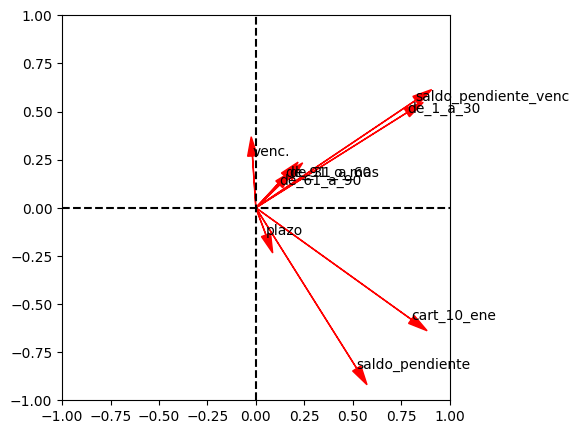

In [18]:
# Obtener las cargas factoriales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
#loadings = pca.components_.T / np.sqrt(pca.explained_variance_) # dividir por el desvío estándar correspondiente

# Obtener los nombres de las variables
var_names = list(X_scaled.columns)
# Crear el gráfico del círculo de correlaciones
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axhline(y=0, color='k', linestyle='--')
ax.axvline(x=0, color='k', linestyle='--')
for i in range(len(var_names)):
    ax.annotate(var_names[i], (loadings[i,0], loadings[i,1]))
    ax.arrow(0, 0, loadings[i,0], loadings[i,1], head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.show()

In [19]:
print(df[df['interes']=='Cartera_sana']['saldo_pendiente'].describe())
print('='*100)
print(df[df['interes']=='Cartera_venc']['saldo_pendiente'].describe())

count    1.696890e+05
mean     2.316051e+06
std      6.342163e+06
min     -3.967431e+07
25%      2.995200e+05
50%      8.226400e+05
75%      2.093529e+06
max      2.875500e+08
Name: saldo_pendiente, dtype: float64
count    69606.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: saldo_pendiente, dtype: float64


# Modelo Logistico

In [20]:
df.columns

Index(['documento', 'razón_social', 'zona', 'factura', 'fecha', 'f.vcto.',
       'plazo', 'venc.', 'saldo_pendiente', 'de_1_a_30', 'de_31_a_60',
       'de_61_a_90', 'de_91_o_mas', 'cart_10_ene', 'semana',
       'saldo_pendiente_venc', 'interes', 'stranomes'],
      dtype='object')

In [21]:
Var_pred = ['plazo', 'venc.', 'saldo_pendiente', 'de_1_a_30', 'de_31_a_60','de_61_a_90', 'de_91_o_mas', 'cart_10_ene', 
            'saldo_pendiente_venc']
x = df[Var_pred] 
y = df['interes']

In [22]:
model = LogisticRegression()
model = model.fit(x, y)

In [23]:
model.score(x, y)

0.9788044046051945

In [24]:
# generate evaluation metrics
print ("Accuracy :", metrics.accuracy_score(y, model.predict(x)))
print ("AUC :", metrics.roc_auc_score(y, model.predict_proba(x)[:,1]))
print ("Confusion matrix :",metrics.confusion_matrix(y, model.predict(x)))
print ("classification report :", metrics.classification_report(y, model.predict(x)))

Accuracy : 0.9788044046051945
AUC : 0.9957622657861382
Confusion matrix : [[166977   2712]
 [  2360  67246]]
classification report :               precision    recall  f1-score   support

Cartera_sana       0.99      0.98      0.99    169689
Cartera_venc       0.96      0.97      0.96     69606

    accuracy                           0.98    239295
   macro avg       0.97      0.98      0.97    239295
weighted avg       0.98      0.98      0.98    239295



In [25]:
M=metrics.confusion_matrix(y, model.predict(x))
print(M)
print ("classification report:", metrics.classification_report(y, model.predict(x)))

[[166977   2712]
 [  2360  67246]]
classification report:               precision    recall  f1-score   support

Cartera_sana       0.99      0.98      0.99    169689
Cartera_venc       0.96      0.97      0.96     69606

    accuracy                           0.98    239295
   macro avg       0.97      0.98      0.97    239295
weighted avg       0.98      0.98      0.98    239295



<Axes: >

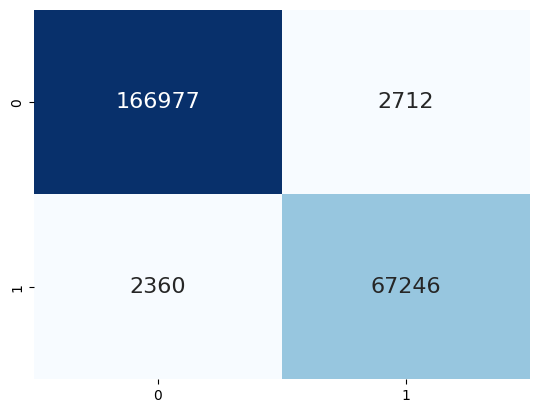

In [26]:
sns.heatmap(M, annot=True, annot_kws={"size": 16}, fmt='d', cmap='Blues', cbar=False)

In [27]:
Prec=M[0,0]/(M[0,0]+M[0,1])
print ("La sensibilidad del modelo es:", Prec)
Rec=M[1,1]/(M[1,1]+M[1,0])
print ("La especificidad del modelo es:", Rec)

La sensibilidad del modelo es: 0.9840178208369429
La especificidad del modelo es: 0.96609487687843


# Analisis agrupado

In [28]:
df[df.duplicated(subset=['documento'], keep=False)].sort_values('documento').head()

,documento,razón_social,zona,factura,fecha,f.vcto.,plazo,venc.,saldo_pendiente,de_1_a_30,de_31_a_60,de_61_a_90,de_91_o_mas,cart_10_ene,semana,saldo_pendiente_venc,interes,stranomes
178507,10004337,GRAJALES DUQUE IDELVER ENRIQUE,CTA1 - CAL-QUI-RIS,HRC-F7Y-00209733-00,2022-12-28,2022-12-28,31,1,0.0,3305136.0,0.0,0.0,0.0,3305136.0,4 semana enero 2023,3305136.0,Cartera_venc,2022-12
164364,10004337,GRAJALES DUQUE IDELVER ENRIQUE,CTA1 - CAL-QUI-RIS,HRC-F7Y-00228764-00,2023-04-01,2023-04-01,30,0,550705.0,0.0,0.0,0.0,0.0,550705.0,4 semana abril 2023,0.0,Cartera_sana,2023-04
164365,10004337,GRAJALES DUQUE IDELVER ENRIQUE,CTA1 - CAL-QUI-RIS,HRC-F7Y-00231073-00,2023-04-19,2023-04-19,30,0,4337265.0,0.0,0.0,0.0,0.0,4337265.0,4 semana abril 2023,0.0,Cartera_sana,2023-04
164366,10004337,GRAJALES DUQUE IDELVER ENRIQUE,CTA1 - CAL-QUI-RIS,HRC-F7Y-00234100-00,2023-04-29,2023-04-29,30,0,437400.0,0.0,0.0,0.0,0.0,437400.0,4 semana abril 2023,0.0,Cartera_sana,2023-04
164367,10004337,GRAJALES DUQUE IDELVER ENRIQUE,CTA1 - CAL-QUI-RIS,HRC-F7Y-00234165-00,2023-04-29,2023-04-29,30,0,881954.0,0.0,0.0,0.0,0.0,881954.0,4 semana abril 2023,0.0,Cartera_sana,2023-04


In [29]:
df['conteo'] = 1
df_agrup = df.groupby(['documento','razón_social']).agg({'conteo':'sum', 'plazo':'mean', 'venc.':['mean','max'], 
                                                         'saldo_pendiente':'mean', 'saldo_pendiente_venc':'mean'})#
df_agrup.columns = df_agrup.columns.map('_'.join).str.strip('-')
df_agrup= df_agrup.reset_index()
df_agrup['var_respuesta'] = np.where(df_agrup['venc._max']>0,'cartera_venc','cartera_sana')
print(df_agrup.shape)
df_agrup.head()

(1618, 9)


,documento,razón_social,conteo_sum,plazo_mean,venc._mean,venc._max,saldo_pendiente_mean,saldo_pendiente_venc_mean,var_respuesta
0,10004337,GRAJALES DUQUE IDELVER ENRIQUE,304,29.812500,9.740132,547,1.109025e+06,247867.917763,cartera_venc
1,1000575488,BARAHONA MARROQUIN MICHELL MARYORI,54,50.722222,0.092593,4,4.374753e+05,6569.148148,cartera_venc
2,10006035,GAVIRIA GRISALES JOHN JAIRO,388,36.185567,32.371134,455,2.558479e+05,378044.680412,cartera_venc
3,1000790988,HERNANDEZ GAITAN SANTIAGO,31,34.709677,2.064516,22,1.373099e+06,692827.967742,cartera_venc
4,1000918720,SOTO ALZATE LEIDY LAURA,466,34.085837,6.931330,424,1.040007e+06,631565.856223,cartera_venc


In [30]:
df_agrup.var_respuesta.value_counts(normalize=True)

var_respuesta
cartera_venc    0.833127
cartera_sana    0.166873
Name: proportion, dtype: float64

In [32]:
df_agrup_numeric = df_agrup.select_dtypes(include=['number'])

<Axes: >

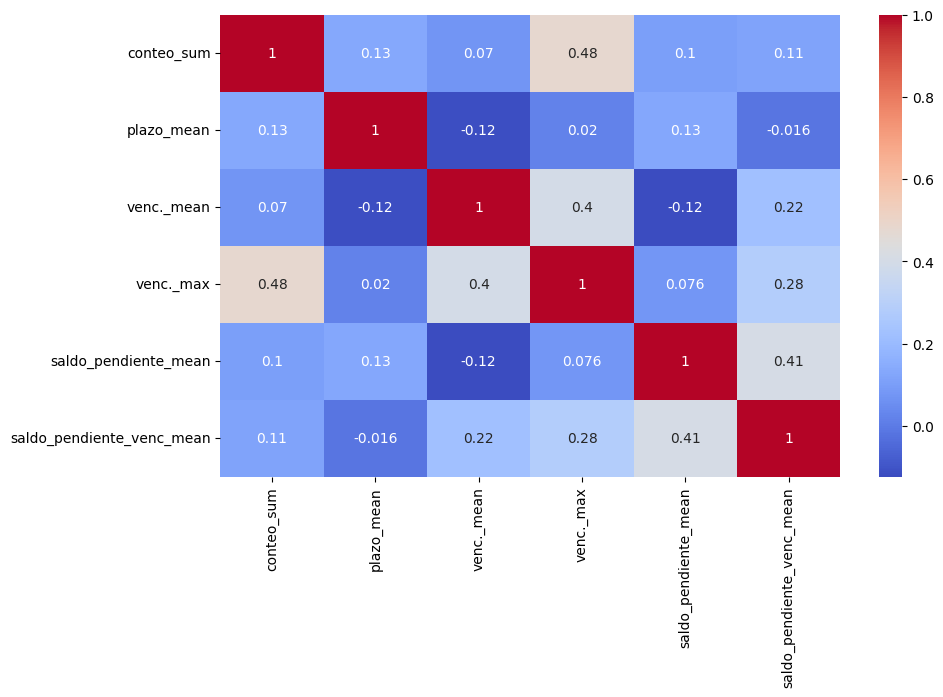

In [33]:
plt.figure(figsize=(10, 6))  # Tamaño de 10 pulgadas de ancho y 6 pulgadas de alto
sns.heatmap(df_agrup_numeric.corr(), annot=True, cmap='coolwarm')

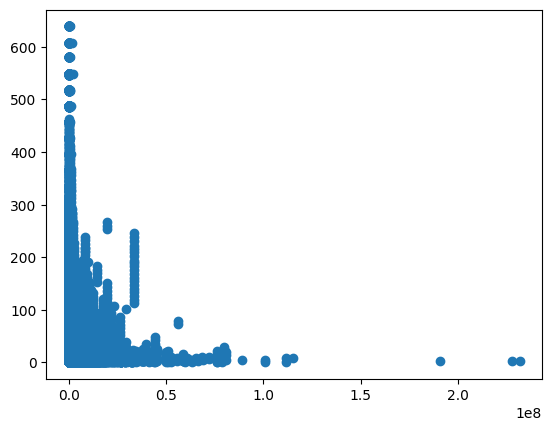

In [34]:
plt.scatter(df['saldo_pendiente_venc'], df['venc.'])

In [35]:
df_agrup.columns

Index(['documento', 'razón_social', 'conteo_sum', 'plazo_mean', 'venc._mean',
       'venc._max', 'saldo_pendiente_mean', 'saldo_pendiente_venc_mean',
       'var_respuesta'],
      dtype='object')

In [36]:
# Estandariza los datos utilizando la función StandardScaler de Scikit-learn
X = df_agrup[['conteo_sum', 'plazo_mean', 'venc._mean',
       'venc._max', 'saldo_pendiente_mean', 'saldo_pendiente_venc_mean']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns, dtype=float)
# Realizar el ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

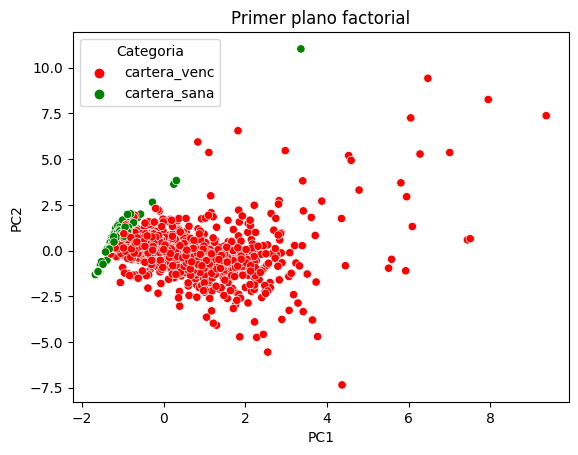

------------------------------------------------------------------------------------------------------------------------
Porcentaje de varianza explicado: 31.323 %


In [37]:
# Graficar los datos en el primer plano factorial
result_pca = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'Categoria': df_agrup.var_respuesta})
sns.scatterplot(data=result_pca, x='PC1', y='PC2', hue='Categoria', palette=['red', 'green'])
# Etiquetar los ejes
plt.title('Primer plano factorial')
plt.xlabel('PC1')
plt.ylabel('PC2')
# Mostrar el gráfico
plt.show()
print('-'*120)
print('Porcentaje de varianza explicado:',round(pca.explained_variance_ratio_[0]*100,3),'%')

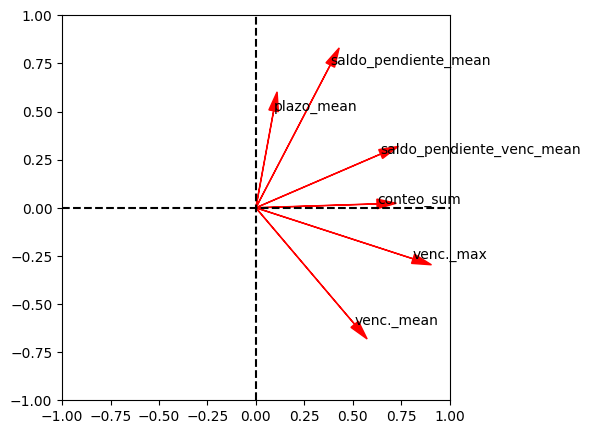

In [38]:
# Obtener las cargas factoriales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
#loadings = pca.components_.T / np.sqrt(pca.explained_variance_) # dividir por el desvío estándar correspondiente

# Obtener los nombres de las variables
var_names = list(X_scaled.columns)
# Crear el gráfico del círculo de correlaciones
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axhline(y=0, color='k', linestyle='--')
ax.axvline(x=0, color='k', linestyle='--')
for i in range(len(var_names)):
    ax.annotate(var_names[i], (loadings[i,0], loadings[i,1]))
    ax.arrow(0, 0, loadings[i,0], loadings[i,1], head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.show()

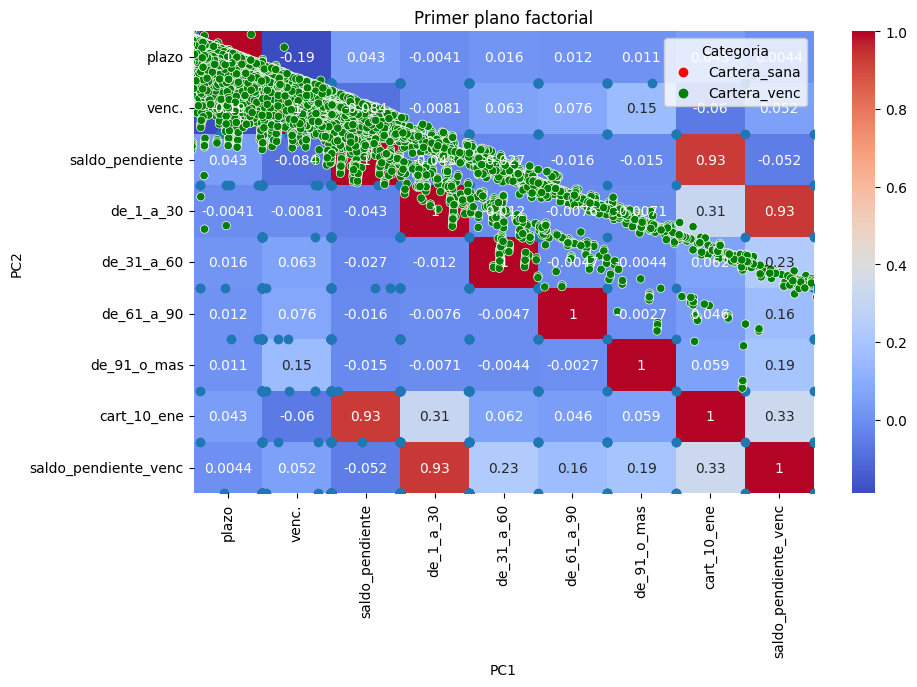

------------------------------------------------------------------------------------------------------------------------
Porcentaje de varianza explicado: 25.253 %


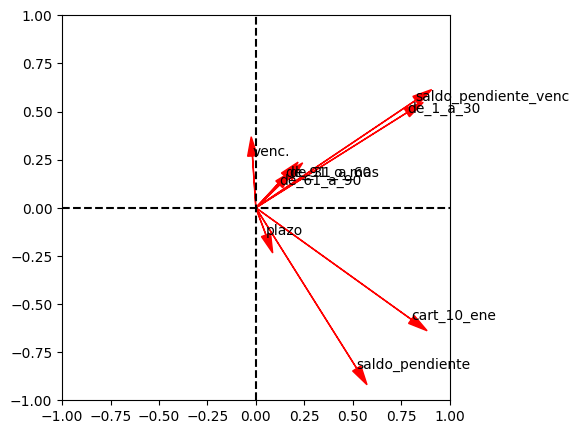

In [40]:
plt.figure(figsize=(10, 6))  # Tamaño de 10 pulgadas de ancho y 6 pulgadas de alto
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')

plt.scatter(df['saldo_pendiente_venc'], df['venc.'])

df.columns

# Estandariza los datos utilizando la función StandardScaler de Scikit-learn
X = df[['plazo', 'venc.', 'saldo_pendiente', 'de_1_a_30', 'de_31_a_60','de_61_a_90', 'de_91_o_mas', 'cart_10_ene',
        'saldo_pendiente_venc']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns, dtype=float)
# Realizar el ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficar los datos en el primer plano factorial
result_pca = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'Categoria': df.interes})
sns.scatterplot(data=result_pca, x='PC1', y='PC2', hue='Categoria', palette=['red', 'green'])
# Etiquetar los ejes
plt.title('Primer plano factorial')
plt.xlabel('PC1')
plt.ylabel('PC2')
# Mostrar el gráfico
plt.show()
print('-'*120)
print('Porcentaje de varianza explicado:',round(pca.explained_variance_ratio_[0]*100,3),'%')

# Obtener las cargas factoriales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
#loadings = pca.components_.T / np.sqrt(pca.explained_variance_) # dividir por el desvío estándar correspondiente

# Obtener los nombres de las variables
var_names = list(X_scaled.columns)
# Crear el gráfico del círculo de correlaciones
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axhline(y=0, color='k', linestyle='--')
ax.axvline(x=0, color='k', linestyle='--')
for i in range(len(var_names)):
    ax.annotate(var_names[i], (loadings[i,0], loadings[i,1]))
    ax.arrow(0, 0, loadings[i,0], loadings[i,1], head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.show()